<a href="https://colab.research.google.com/github/arocavanaclocha/public/blob/main/GoogleKeywords.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [ ]:
!pip install --upgrade --user git+https://github.com/GeneralMills/pytrends
!git clone https://github.com/arocavanaclocha/public.git
!python /content/public/core/GoogleTrends.py



*   [PyTrends](https://github.com/GeneralMills/pytrends#installation)
*   [My core libs](https://github.com/arocavanaclocha/public/blob/main/core/GoogleTrends.py)



* [Trends categories](https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories)
* [Time series 1](https://github.com/2wavetech/How-to-Check-if-Time-Series-Data-is-Stationary-with-Python)
*  [Time series 2](https://www.machinelearningplus.com/time-series/time-series-analysis-python/)


# Settings

In [37]:
#@title Selecting the keywords
#@markdown Execute play after modifying fileds.
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
from pytrends.request import TrendReq
import time
import pandas as pd
import matplotlib

!python /content/ebir/oceans/GoogleTrends.py
import public.core.GoogleTrends as GTRENDS

#@markdown ......



#@markdown ......


plt.style.use('seaborn-darkgrid')
#matplotlib.rcParams['font.family'] = ['Heiti TC']
def rmax(maxrow: int=50):
    pd.set_option('display.max_rows', maxrow)

def cmax(maxcol: int=50):
    pd.set_option('display.max_columns', maxcol)


start_date = '2018-01-01' #@param {type:"date"}
end_date    = '2021-01-15' #@param {type:"date"}
category    = 'All'  #@param ["All", "Beauty & Fitness", "Home & Garden", "Bathroom"]

cats={
    "All":0,
    "Beauty & Fitness": 44,
    "Home & Garden":11,
    "Bathroom": 1365
    }
show_totals = False #@param {type:"boolean"}
geo         = '' #@param ["", "es", "de"]
gprop       = '' #@param [""]
keyword1 = 'bathroom mirror' #@param {type:"string"}
keyword2 = '' #@param {type:"string"}
keyword3 = '' #@param {type:"string"}
keyword4 = '' #@param {type:"string"}
keyword5 = '' #@param {type:"string"}

keywords=[keyword1, keyword2, keyword3, keyword4, keyword5]
keywords = [x for x in keywords if x != '']

category = cats[category]
timeframe   = GTRENDS.getTimeFrame(start_date, end_date) # timeframe = 'today 12-m'


python3: can't open file '/content/ebir/oceans/GoogleTrends.py': [Errno 2] No such file or directory


In [38]:
#keywords=['makeup vanity', 'makeup mirror']
#, 'espejo de maquillaje'] #'cosmetic mirror', Desktop mirror, vanity mirror, 'beauty mirror', 'portable Mirror', 'magnifier mirror'
#keywords=['Espejo de aumento', 'espejo de tocador', 'espejo de maquillaje']
#'kosmetikspiegel', 
#keywords=['cosmetic mirror','beauty mirror', 'makeup mirror']

# Visualization

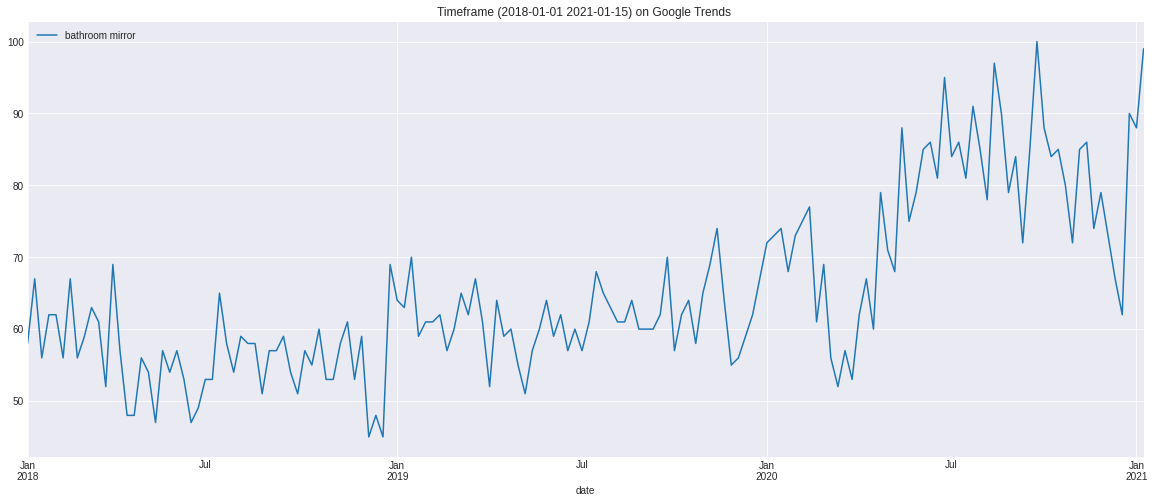

In [39]:
df = GTRENDS.show_keywords_trends(
                      keywords=keywords,
                      timeframe = timeframe,
                      show_totals = show_totals, 
                      category = category,
                      geo=geo, 
                      gprop=gprop
                    )

trends = GTRENDS.TrendReq ()

trends.build_payload( kw_list=keywords, 
                      timeframe = timeframe,
                      cat = category,
                      geo=geo, 
                      gprop=gprop
                    )
interest_over_time = trends.interest_over_time()
interest_over_time= interest_over_time.drop(labels=['isPartial'],axis='columns')
#image = interest_over_time.plot(title = f'KEYWORDS({keywords}) in last ({timeframe}) on Google Trends ').get_figure()

In [40]:
interest_by_region = trends.interest_by_region(resolution='COUNTRY', inc_low_vol=True, inc_geo_code=False)
for kw in keywords:
  print((interest_by_region.sort_values(by=[kw], ascending=False))[kw].head(25))

geoName
United Kingdom          100
Ireland                  68
Australia                37
United States            36
New Zealand              31
Canada                   27
St. Helena               24
Jamaica                  20
Singapore                19
South Africa             16
Sri Lanka                13
Lebanon                  13
United Arab Emirates     13
Philippines              10
Pakistan                  9
Qatar                     9
India                     9
Nepal                     8
Malaysia                  8
Bangladesh                7
Laos                      6
Vietnam                   5
Nigeria                   5
Kenya                     4
Egypt                     4
Name: bathroom mirror, dtype: int64


In [41]:
for kw in keywords:
  suggestions = trends.suggestions(kw)
  print(f'Keyword: {kw}')
  print(suggestions)

Keyword: bathroom mirror
[{'mid': '/g/11h79tyyjr', 'title': 'Bathroom Mirror', 'type': 'Topic'}]


In [42]:
related_topics = trends.related_topics()
print(related_topics)
#topics[kw]['top']
#topics[keyword]['rising']


{'bathroom mirror': {'rising':     value formattedValue  ...           topic_title                  topic_type
0     300          +300%  ...      Industrial music               Musical genre
1     300          +300%  ...          Black Mirror   British television series
2     250          +250%  ...             Farmhouse                       Topic
3     170          +170%  ...                  Barn                Building use
4     150          +150%  ...               Wayfair        Online store company
5     140          +140%  ...                Circle                    2D shape
6     120          +120%  ...               Wayfair                       Topic
7     100          +100%  ...        Bathroom Shelf                       Topic
8      80           +80%  ...                 Wilko      Hardware store company
9      80           +80%  ...             Bluetooth                       Topic
10     80           +80%  ...                   CB2                       Topic
11     80

In [43]:
related_queries = trends.related_queries()

for kw in keywords:
  print(f'Keyword: {kw}')
  print(related_queries[kw]['top'])
  print(related_queries[kw]['rising'])

Keyword: bathroom mirror
                      query  value
0   mirror bathroom cabinet    100
1            mirror cabinet     96
2          bathroom cabinet     90
3           bathroom vanity     68
4    bathroom vanity mirror     68
5       mirror for bathroom     68
6             vanity mirror     67
7        mirror in bathroom     67
8                    vanity     66
9                   mirrors     65
10         bathroom mirrors     65
11              wall mirror     61
12     bathroom wall mirror     60
13    bathroom mirror light     51
14           bathroom light     49
15   bathroom mirror lights     44
16               led mirror     42
17          bathroom lights     41
18      led bathroom mirror     40
19    bathroom round mirror     30
20           bathroom ideas     30
21             black mirror     28
22    black bathroom mirror     28
23             round mirror     28
24    bathroom mirror ideas     28
                                     query  value
0         round

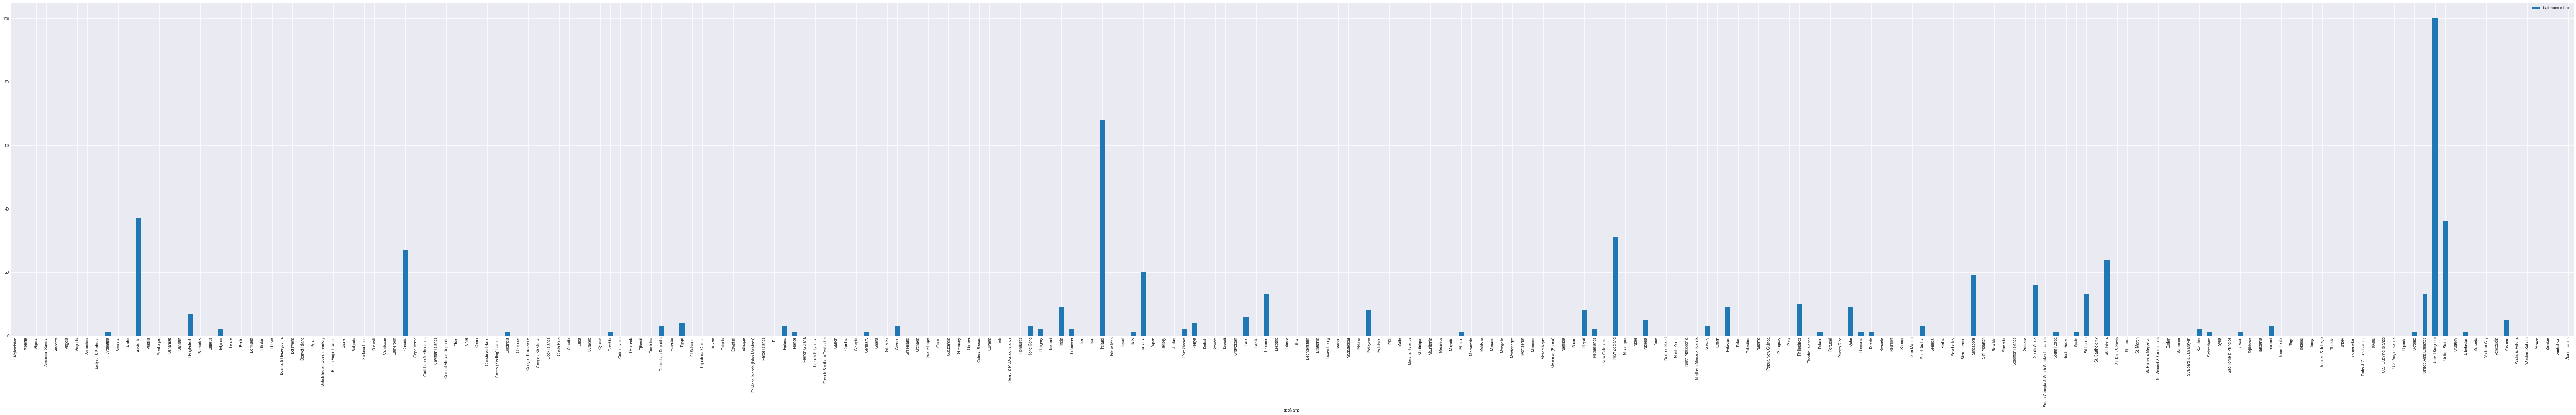

In [44]:
interest_by_region.reset_index().plot(x="geoName", y=keywords, figsize=(120,16), kind="bar")
plt.show()

In [46]:
keyword_analyze = 'bathroom mirror' #@param {type:"string"}
top_x = 10 #@param {type:"slider", min:0, max:20, step:1}

interest_by_region[keyword_analyze].nlargest(top_x)

geoName
United Kingdom    100
Ireland            68
Australia          37
United States      36
New Zealand        31
Canada             27
St. Helena         24
Jamaica            20
Singapore          19
South Africa       16
Name: bathroom mirror, dtype: int64

## Visualize Time series

## Time series decomposition 
Time series decomposition (base level, trend, seasonal index and residual)

bathroom mirror


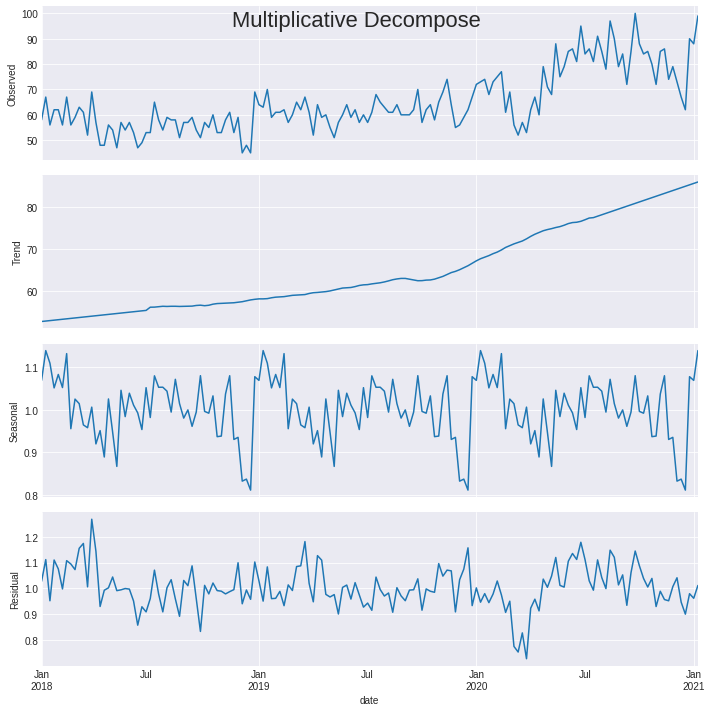

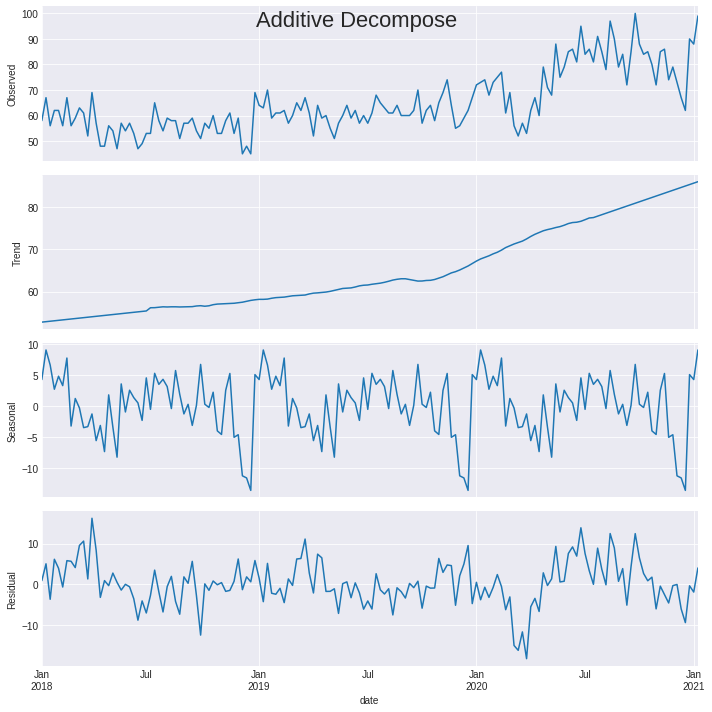

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

for kw in df:
  print(kw)
  # Multiplicative Decomposition 
  result_mul = seasonal_decompose(df[kw], model='multiplicative', extrapolate_trend='freq')

  # Additive Decomposition
  result_add = seasonal_decompose(df[kw], model='additive', extrapolate_trend='freq')

  # Plot
  plt.rcParams.update({'figure.figsize': (10,10)})
  result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22)
  result_add.plot().suptitle('Additive Decompose', fontsize=22)
  plt.show()

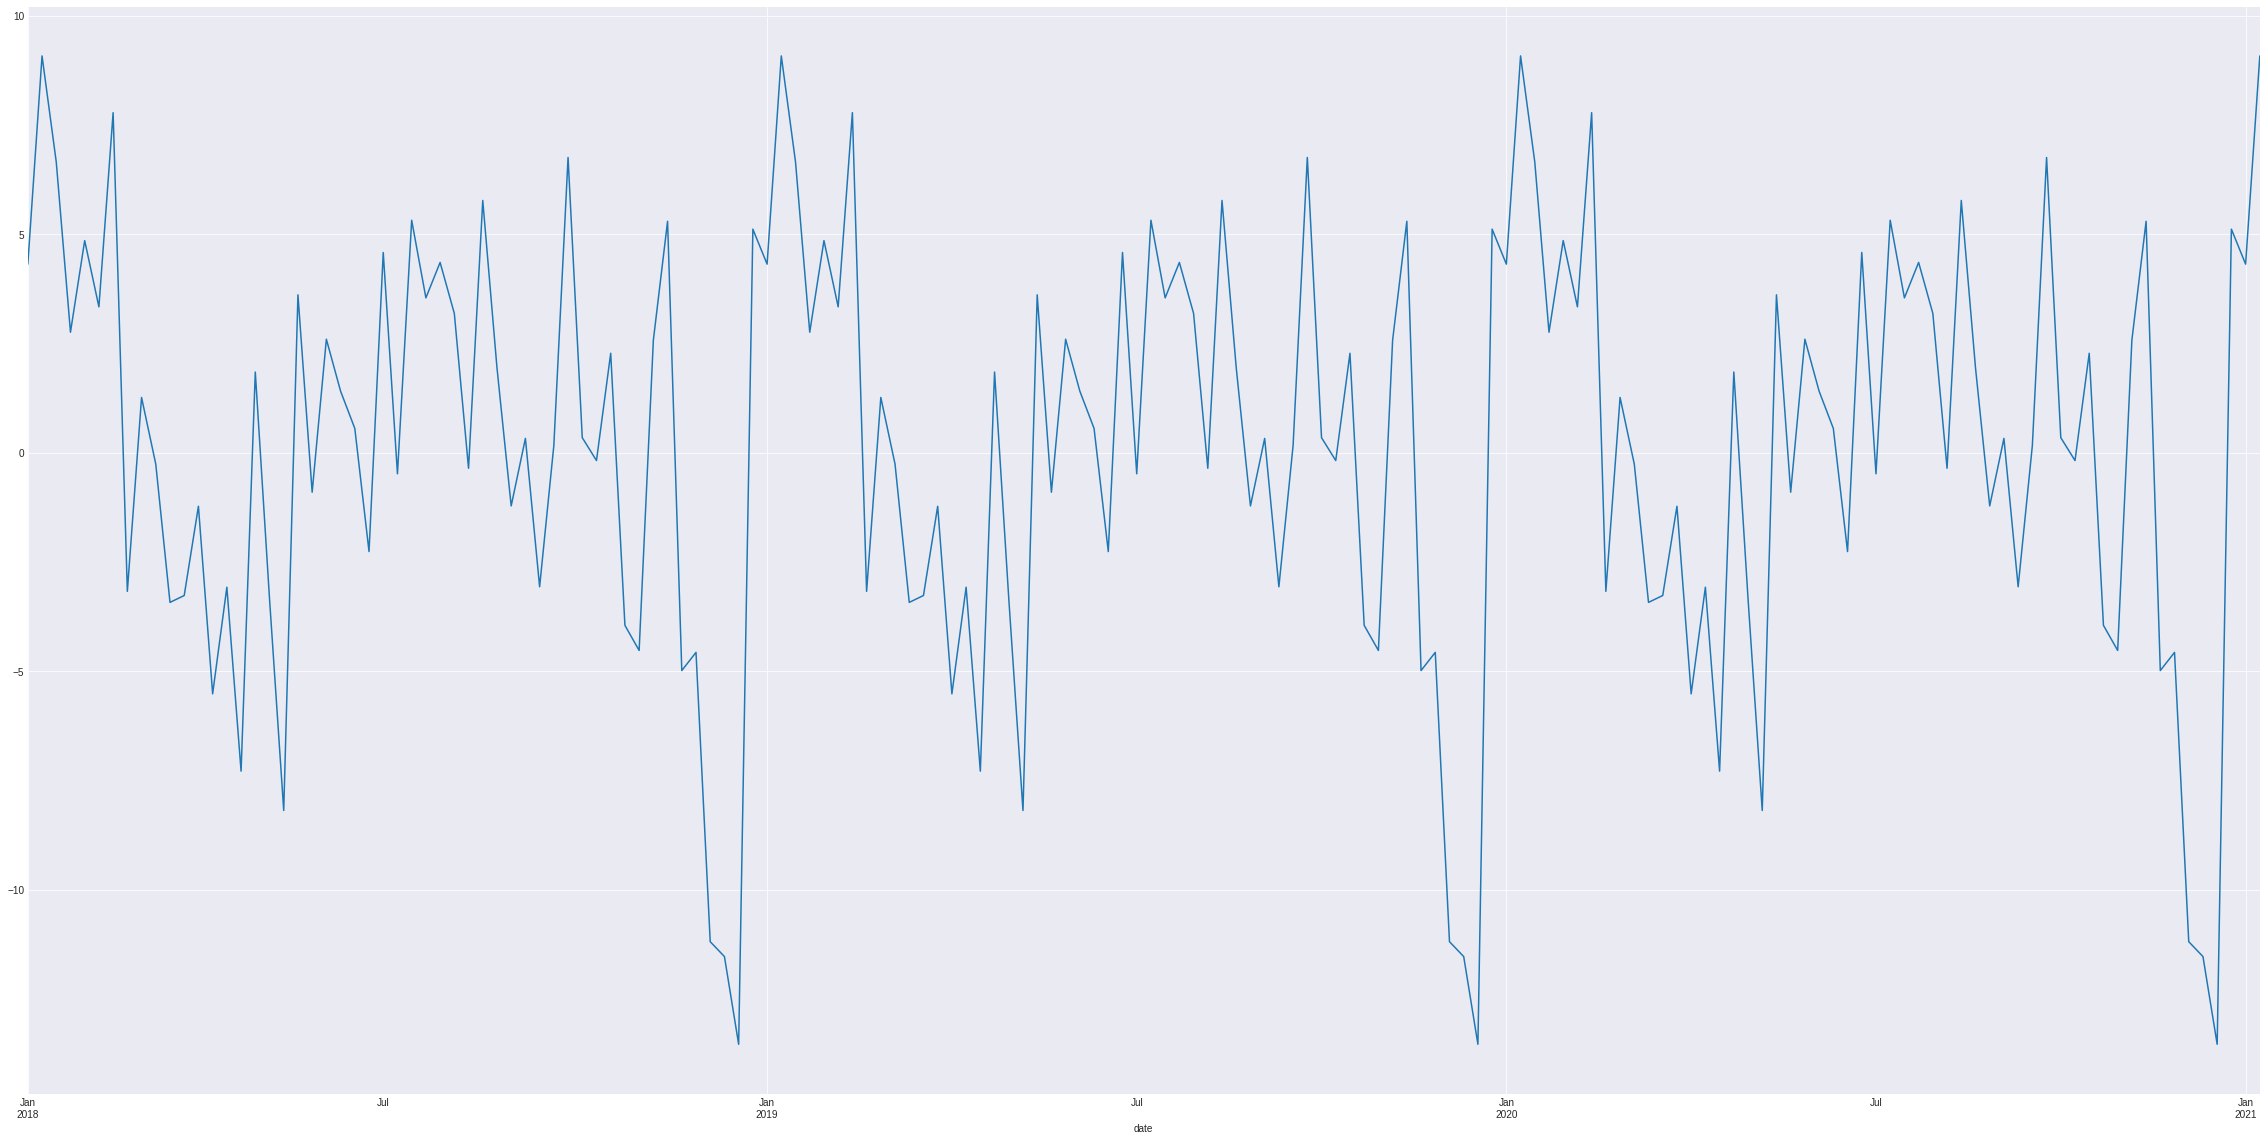

In [48]:
result_add.seasonal.plot(figsize=(40,20))

## Stationality from Gauss chart

mean1=bathroom mirror    56.636364
dtype: float64, mean2=bathroom mirror    69.699029
dtype: float64
var1=bathroom mirror    36.643098
dtype: float64, var2=bathroom mirror    36.643098
dtype: float64


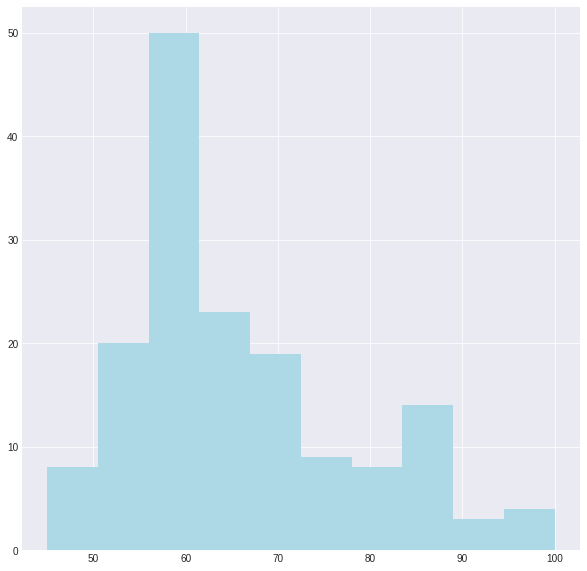

In [53]:
plt.hist(df[keyword_analyze], color="lightblue")
#Split the data
df1, df2=df[0:55], df[55:]
#Mean of data
mean1, mean2 = df1.mean(), df2.mean()
#Variance of data
var1, var2 = df1.var(), df2.var()
print(f'mean1={mean1}, mean2={mean2}' )
print(f'var1={var1}, var2={var1}')

## Check if a data set or time series is random by Lag Plots

Used to check if a data set or time series is random. Random data should not exhibit any structure in the lag plot. Non-random structure implies that the underlying data are not random.

In [51]:
#show_lag_plot(df)

NameError: ignored

## Auto-correlation plot

Autocorrelation is the correlation of a variable with itself at differing time lags. 

Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band.

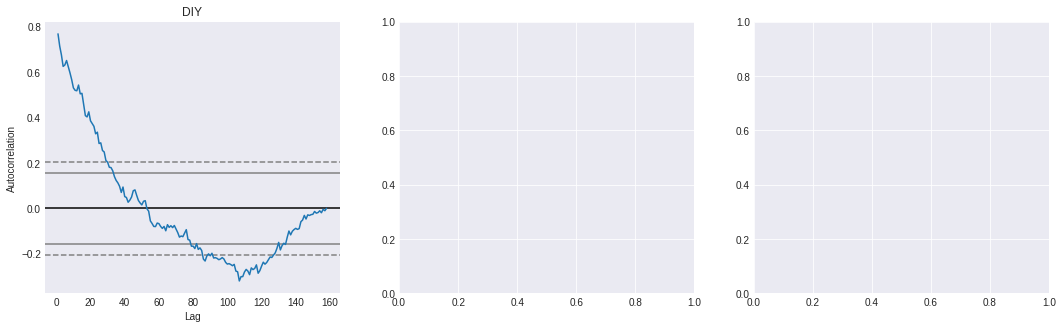

In [54]:
from pandas.plotting import autocorrelation_plot

f3, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(18, 5))
#f3.tight_layout()

autocorrelation_plot(df[keyword_analyze], ax=ax7)
ax7.set_title('DIY');
'''
autocorrelation_plot(df["Toilet paper"], ax=ax8)
ax8.set_title('Toilet paper');

autocorrelation_plot(df["leroy merlin"], ax=ax9)
ax9.set_title('leroy merlin');'''

plt.show()


Correlation and Autocorrelation by Statsmodels Library


Statistical correlation summarizes the strength of the relationship between two variables.

We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson correlation coefficient to summarize the correlation between the variables.

The Pearson correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

Below is an example of calculating and plotting the autocorrelation plot for the Minimum Daily Temperatures using the plot_acf() function from the statsmodels library.

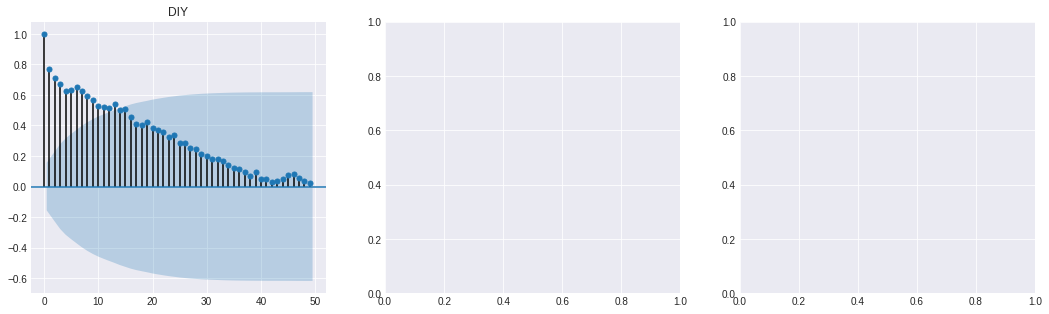

In [55]:
from statsmodels.graphics.tsaplots import plot_acf

f1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
#f3.tight_layout()

plot_acf(df[keyword_analyze], ax=ax1, lags = range(0,50))
ax1.set_title('DIY')
'''
plot_acf(df["Toilet paper"], ax=ax2, lags = range(0, 20))
ax2.set_title('Toilet paper')

plot_acf(df["leroy merlin"], ax=ax3, lags = range(0, 5))     # note that max lags is 35
ax3.set_title('leroy merlin')'''

plt.show()

* https://www.machinelearningplus.com/time-series/time-series-analysis-python/
* https://github.com/2wavetech/How-to-Check-if-Time-Series-Data-is-Stationary-with-Python
* https://github.com/qztseng/google-trends-daily/blob/master/google%20Trend%20daily%20data%20for%20Brexit.ipynb


##Modelling the data

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(df[keyword_analyze], order=(50,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals

print(residuals.describe())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  % freq, ValueWarning)
